Simulation of a Noddy history and analysis of its voxel topology
=============

Example of how the module can be used to run Noddy simulations and analyse the output.

In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [2]:
# Basic settings
import sys, os
import subprocess

# Now import pynoddy
import pynoddy
%matplotlib inline

# determine path of repository to set paths corretly below

repo_path = os.path.realpath('../..')

Compute the model
------------------

The simplest way to perform the Noddy simulation through Python is simply to call the executable. One way that should be fairly platform independent is to use Python's own subprocess module:

In [3]:
# Change to sandbox directory to store results
os.chdir(os.path.join(repo_path, 'sandbox'))

# Path to exmaple directory in this repository
example_directory = os.path.join(repo_path,'examples')
# Compute noddy model for history file
history_file = 'strike_slip.his'
history = os.path.join(example_directory, history_file)
nfiles = 1
files = '_'+str(nfiles).zfill(4)
print "files", files
root_name = 'noddy_out'
output_name = root_name + files
print root_name
print output_name
# call Noddy

# NOTE: Make sure that the noddy executable is accessible in the system!!
sys
print subprocess.Popen(['noddy.exe', history, output_name, 'TOPOLOGY'], 
                       shell=False, stderr=subprocess.PIPE, 
                       stdout=subprocess.PIPE).stdout.read()
#
sys
print subprocess.Popen(['topology.exe', root_name, files], 
                       shell=False, stderr=subprocess.PIPE, 
                       stdout=subprocess.PIPE).stdout.read()

files _0001
noddy_out
noddy_out_0001




For convenience, the model computations are wrapped into a Python function in pynoddy:

In [4]:
pynoddy.compute_model(history, output_name)
pynoddy.compute_topology(root_name, files)


Note: The Noddy call from Python is, to date, calling Noddy through the subprocess function. In a future implementation, this call could be subsituted with a full wrapper for the C-functions written in Python. Therefore, using the member function compute_model is not only easier, but also the more "future-proof" way to compute the Noddy model.

Loading Topology output files
--------------------------

Here we load the binary adjacency matrix for one topology calculation and display it as an image


maxlitho = 7

noddy_out_uam.bin
7



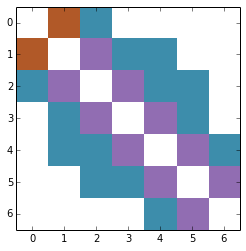

In [5]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

N1 = pynoddy.NoddyOutput(output_name)
AM= pynoddy.NoddyTopology(output_name)

am_name=root_name +'_uam.bin'
print am_name
print AM.maxlitho

image = np.empty((int(AM.maxlitho),int(AM.maxlitho)), np.uint8)

image.data[:] = open(am_name).read()
cmap=plt.get_cmap('Paired')
cmap.set_under('white')  # Color for values less than vmin

plt.imshow(image, interpolation="nearest", vmin=1, cmap=cmap)
plt.show()